# Gradient-Base Optimization in Statistics

In [1]:
import autograd.numpy as np
import autograd.numpy.random as npr
from autograd import elementwise_grad as egrad
import matplotlib.pyplot as plt
from autograd.misc.optimizers import adam

%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

Linear and logistic regression are common models implemented in statistics. When we train a linear model, we are essentially optimizing weights with respect to the loss function.

Let's look at logistic regression for classification purposes. Logistic regression builds upon linear regression, by adding a sigmoid function after a linear transformation. In the simplified example below (which eliminates bias terms, and only keeps weight terms):

$$ y = \text{sigmoid}(w \cdot x) $$

$ w $ is the weights vector, $ x $ is the data, in $ y $ is the output.

The sigmoid function is defined as such:

$$ \text{sigmoid}(x) = \frac{\text{tanh}(x) + 1}{2} $$

By using the logistic prediction function, we get class probabilities. 

For classification problems, we often use cross entropy as the loss function. Cross entropy is defined as:

$$ -(y \text{log}(p) + (1-y) \text{log}(1-p)) $$

Where $ y $ is the actual class (1 or zero), and $ p $ is predicted value.

In [2]:
import autograd.numpy as np
from autograd import grad

def sigmoid(x):
    return 0.5*(np.tanh(x) + 1)

def logistic_predictions(weights, inputs):
    # Outputs probability of a label being true according to logistic model.
    return sigmoid(np.dot(inputs, weights))

def training_loss(weights):
    # Training loss is the negative log-likelihood of the training labels.
    preds = logistic_predictions(weights, inputs)
    label_probabilities = preds * targets + (1 - preds) * (1 - targets)
    return -np.sum(np.log(label_probabilities))

# Build a toy dataset.
inputs = np.array([[0.52, 1.12,  0.77],
                   [0.88, -1.08, 0.15],
                   [0.52, 0.06, -1.30],
                   [0.74, -2.49, 1.39]])
targets = np.array([True, True, False, True])

# Define a function that returns gradients of training loss using Autograd.
training_gradient_fun = grad(training_loss)

# Optimize weights using gradient descent.
weights = np.array([0.0, 0.0, 0.0])
print("Initial loss:", training_loss(weights))
for i in range(200):
    weights -= training_gradient_fun(weights) * 0.01

print("Trained loss:",  training_loss(weights))

Initial loss: 2.77258872224
Trained loss: 0.208380885015


Let's try a toy linear regression problem. Make some fake data.

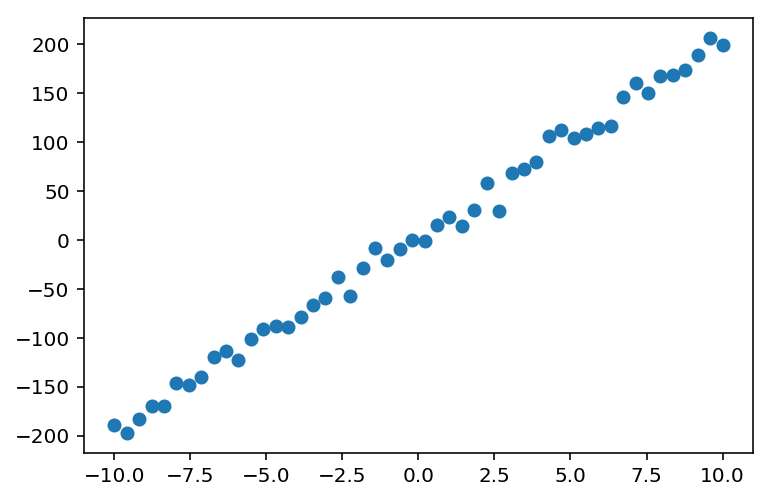

In [14]:
# Params:
M = 20
C = 4 
x = np.linspace(-10, 10, 50)
y = M * x  + C + npr.normal(size=50)* 10
plt.scatter(x, y)

The error function for linear regression is mean squared error.

$$ \frac{\sum \hat y - y}{n} $$

In [ ]:
def loss(params):
    